# **EnviroHealth ML : Predicting Life Expectancy from Environmental Factors**

##**SECP3223 - 01**

##**LECTURE NAME :** NOR ERNE NAZIRA BINTI BAZIN

## **GROUP MEMBERS:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>MULYANI BINTI SARIPUDDIN</th>
    <th>A22EC0223</th>
  </tr>
  <tr>
    <th>NUR ALEYSHA QURRATU'AINI BINTI MAT SALLEH</th>
    <th>A22EC0241</th>
  </tr>
  <tr>
    <th>NIK ZULAIKHAA BINTI ZURAIDI AFFANDI</th>
    <th>A22EC0232</th>
  </tr>
  <tr>
    <th>NADHRAH NUR SABRINA BINTI ZULAINI</th>
    <th>A22EC0224</th>
  </tr>
  <tr>
    <th>NUR ARINI FATIHAH BINTI MOHD SABIR</th>
    <th>A22EC0244</th>
  </tr>
</table>

# **Download the Dataset**

1. Download the dataset (web_download.xlsx) from the link given in the instruction.


# **Data Preparation and Cleaning**

Data preparation is the process of leaning and transforming raw data prior to processing and analysis. it is an important step to prior to processing and often involves reformatting data, making corrections to data and select indicators that related to our research.

First, we import all the required libraries from Pyhton

In [ ]:
# Libraries for data handling and preparation
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


Load the dataset into a data frame using Pandas but transform the xlsx file into csv file first

In [ ]:
# Load the 'data' sheet from the Excel file
file_path = 'web_download.xlsx'  # replace with the path to your .xlsx file
df = pd.read_excel(file_path, sheet_name='data')

# Save the data as a CSV file
df.to_csv('web_downlaod.csv', index=False)  # replace with desired .csv file name

print(f"Excel file has been successfully converted to CSV and saved {df}")


Excel file has been successfully converted to CSV and saved                                                 IND_NAME DIM_GEO_NAME  \
0                 Adolescent birth rate (per 1000 women)  Afghanistan   
1                 Adolescent birth rate (per 1000 women)  Afghanistan   
2      Age-standardized mortality rate attributed to ...  Afghanistan   
3      Age-standardized prevalence of hypertension am...  Afghanistan   
4      Age-standardized prevalence of obesity among a...  Afghanistan   
...                                                  ...          ...   
10498  Total alcohol per capita (≥ 15 years of age) c...     Zimbabwe   
10499  Total net official development assistance to m...     Zimbabwe   
10500    Tuberculosis incidence (per 100 000 population)     Zimbabwe   
10501                        UHC: Service coverage index     Zimbabwe   
10502   Under-five mortality rate (per 1000 live births)     Zimbabwe   

                   IND_CODE DIM_GEO_CODE  DIM_TIME_YEAR        

Before processing the data, we should explore the number of rows and column and also ranges of values of our datasets

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IND_NAME        10503 non-null  object 
 1   DIM_GEO_NAME    10503 non-null  object 
 2   IND_CODE        10503 non-null  object 
 3   DIM_GEO_CODE    10503 non-null  object 
 4   DIM_TIME_YEAR   10503 non-null  int64  
 5   DIM_1_CODE      3863 non-null   object 
 6   VALUE_NUMERIC   10503 non-null  float64
 7   VALUE_STRING    10503 non-null  object 
 8   VALUE_COMMENTS  1847 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 738.6+ KB


Convert year to integer

In [ ]:
df['DIM_TIME_YEAR'] = pd.to_numeric(df['DIM_TIME_YEAR'], errors='coerce')


Handle numeric values

In [ ]:
df['VALUE_NUMERIC'] = pd.to_numeric(df['VALUE_NUMERIC'], errors='coerce')
df['VALUE_STRING'] = pd.to_numeric(df['VALUE_STRING'], errors='coerce')

Describe function is a useful way to know the characteristic of data by getting a summary about the data.

In [ ]:
df.describe()

,DIM_TIME_YEAR,VALUE_NUMERIC,VALUE_STRING
count,10503.000000,1.050300e+04,10328.000000
mean,2020.753499,4.625948e+05,40.763701
std,1.641991,1.985762e+07,105.442430
min,2014.000000,0.000000e+00,0.000000
25%,2020.000000,5.433967e+00,5.500000
50%,2021.000000,2.204675e+01,21.880000
75%,2022.000000,6.490374e+01,64.000000
max,2023.000000,1.619405e+09,8496.550000


Define keywords for Filtering Related Indicators

In [ ]:
keywords = [
    'Mortality rate attributed to unsafe WASH services (per 100,0000 population)',
    'Annual mean concentrations of fine particulate matter (PM2.5) in urban areas (µg/m3)',
    'Proportion of population using safely-managed sanitation services (%)',
    'Proportion of population using safely-managed drinking-water services (%)',
    'Proportion of population using safely-managed drinking-water services (%)',
    'Proportion of population using a hand-washing facility with soap and water (%)',
    'Age-standardized mortality rate attributed to household and ambient air pollution  (per 100 000 population)',
    'Amount of water- and sanitation-related official development assistance that is part of a government-coordinated spending plan (constant 2020 US$ millions)',
    'Life expectancy at birth (years)'
]


Filter indicators matching the keywords

In [ ]:
indicator_names = df['IND_NAME'].dropna().unique()

related_indicators = [ind for ind in indicator_names if any(keyword.lower() in ind.lower() for keyword in keywords)]


Print the related indicators

In [ ]:
print("Related Indicators:")
for keywords in related_indicators:
    print(keywords)


Related Indicators:
Age-standardized mortality rate attributed to household and ambient air pollution  (per 100 000 population) 
Amount of water- and sanitation-related official development assistance that is part of a government-coordinated spending plan (constant 2020 US$ millions)
Annual mean concentrations of fine particulate matter (PM2.5) in urban areas (µg/m3)
Healthy life expectancy at birth (years)
Life expectancy at birth (years)
Proportion of population using a hand-washing facility with soap and water (%)
Proportion of population using safely-managed drinking-water services (%)
Proportion of population using safely-managed sanitation services (%)


Filter the dataset to include only rows with the related indicators

In [ ]:
filtered_data = df[df['IND_NAME'].isin(related_indicators)]


Save the filtered dataset to a csx file for further analysis

In [ ]:
filtered_data.to_csv('filtered_data.csv', index=False)


Display the summary of the filtered dataset

In [ ]:
print(f"\nFiltered Dataset contains {filtered_data.shape[0]} rows and {filtered_data.shape[1]} columns.")
print(filtered_data.head())



Filtered Dataset contains 2029 rows and 9 columns.
                                             IND_NAME DIM_GEO_NAME  \
2   Age-standardized mortality rate attributed to ...  Afghanistan   
6   Amount of water- and sanitation-related offici...  Afghanistan   
7   Annual mean concentrations of fine particulate...  Afghanistan   
15           Healthy life expectancy at birth (years)  Afghanistan   
16           Healthy life expectancy at birth (years)  Afghanistan   

       IND_CODE DIM_GEO_CODE  DIM_TIME_YEAR DIM_1_CODE  VALUE_NUMERIC  \
2    SDGAIRBODA          AFG           2019   SEX_BTSX     265.664520   
6      SDGODAWS          AFG           2022        NaN      67.955803   
7       SDGPM25          AFG           2019        NaN      75.187180   
15  WHOSIS_0002          AFG           2021   SEX_FMLE      51.312912   
16  WHOSIS_0002          AFG           2021    SEX_MLE      49.646950   

    VALUE_STRING VALUE_COMMENTS  
2         265.70            NaN  
6          67.96    

We can handle missing, incorrect and invalid data to remove any outlier if got.

In [ ]:
print(filtered_data.isnull().sum())

IND_NAME             0
DIM_GEO_NAME         0
IND_CODE             0
DIM_GEO_CODE         0
DIM_TIME_YEAR        0
DIM_1_CODE         687
VALUE_NUMERIC        0
VALUE_STRING         1
VALUE_COMMENTS    2029
dtype: int64


We can also count the value of not null for each column

In [ ]:
filtered_data.notna().sum()

,0
IND_NAME,2029
DIM_GEO_NAME,2029
IND_CODE,2029
DIM_GEO_CODE,2029
DIM_TIME_YEAR,2029
DIM_1_CODE,1342
VALUE_NUMERIC,2029
VALUE_STRING,2028
VALUE_COMMENTS,0


Fill missing DIM_1_CODE with 'UNSPECIFIED'

In [ ]:
filtered_data.loc[:, 'DIM_1_CODE'] = filtered_data['DIM_1_CODE'].fillna('UNSPECIFIED')


Fill missing VALUE_COMMENTS and VALUE_STRING with 'UNKNOWN'

In [ ]:
filtered_data.loc[:, 'VALUE_COMMENTS'] = filtered_data['VALUE_COMMENTS'].fillna('UNKNOWN')
filtered_data.loc[:, 'VALUE_STRING'] = filtered_data['VALUE_STRING'].fillna('0.0')


<ipython-input-19-1ac35aa4746d>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[265.7 67.96 75.2 ... 42.0 27.0 32.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_data.loc[:, 'VALUE_STRING'] = filtered_data['VALUE_STRING'].fillna('0.0')


Check missing values in the filtered_data

In [ ]:
print("Missing Values in Filtered Data:")
print(filtered_data.isnull().sum())


Missing Values in Filtered Data:
IND_NAME          0
DIM_GEO_NAME      0
IND_CODE          0
DIM_GEO_CODE      0
DIM_TIME_YEAR     0
DIM_1_CODE        0
VALUE_NUMERIC     0
VALUE_STRING      0
VALUE_COMMENTS    0
dtype: int64


The result show that there are not any not null values in all of the column. nest we need to know the number of duplicated rows for each column and remove them

In [ ]:
# Check for duplicate rows
duplicate_rows = filtered_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


No duplicate rows found.

# **Research Question**

1.   Which regions have the highest air pollution- related mortality rates, and how they compare in terms of publiic health outcomes like life expectancy?
2.   Which countries or regions have the highest annual mean concentrations of PM2.5, and how does this correlate wit their life expectancy?
3. What progress has been made in improving access to sanitaion services and which countries have achieved the greatest improvements?
4. What is the relationship between access to clean water and sanitation services and life expectancy at birth across different regions?

###Q1. Which regions have the highest air pollution-related mortality rates and how they compare in terms of public health outcomes like life expectancy ?

Firstly, two indicators that are essential to the analysis  are defined:
  - Air Pollution Mortality Rate: This represents the number of deaths attributed to air pollution per 100,000 people.
  - Life Expectancy: This represents the average number of years a person is expected to live.

  These indicators help connect air pollution's health impact to life expectancy in different regions.

  Here also include appropriate data aggregation and group operations

In [ ]:
# Two relevant indicators are defined
relevant_indicators = [
    "Age-standardized mortality rate attributed to household and ambient air pollution  (per 100 000 population) ",
    "Life expectancy at birth (years)"
]

The dataset is then transformed into a summary table (region_summary), where:

- Each region (DIM_GEO_NAME) is represented as a row.
- The indicators (mortality rate and life expectancy) are represented as columns.
- The values for these indicators are taken from the VALUE_NUMERIC column.


In [ ]:
# Filters the dataset to include only rows with the specified relevant indicators
filtered_data2 = filtered_data[filtered_data['IND_NAME'].isin(relevant_indicators)]

# Transforms the dataset into a summary table
region_summary = filtered_data2.pivot_table(
    index=['DIM_GEO_NAME'],
    columns='IND_NAME',
    values='VALUE_NUMERIC'
).reset_index()

# Renames columns for clarity
region_summary.columns = ['Region', 'Air Pollution Mortality Rate', 'Life Expectancy']

# Sorts the data by Air Pollution Mortality Rate in descending order
region_summary.sort_values(by='Air Pollution Mortality Rate', ascending=False, inplace=True)

print(region_summary.head())

                       Region  Air Pollution Mortality Rate  Life Expectancy
32   Central African Republic                    305.136688        52.419407
98                    Lesotho                    288.292145        51.604303
156           Solomon Islands                    281.244995        64.892988
0                 Afghanistan                    265.664520        59.172241
185                   Vanuatu                    259.901550        66.506748


After the data is sorted, the top 5, bottom 5, and average 5 regions are selected to highlight the most significant data.

In [ ]:
# Top 5 highest mortality rates
top_5_air_pollution = region_summary.nlargest(5, 'Air Pollution Mortality Rate')
print("Top 5 Regions with Highest Air Pollution Mortality Rates:")
print(top_5_air_pollution)

# Bottom 5 lowest mortality rates
bottom_5_air_pollution = region_summary.nsmallest(5, 'Air Pollution Mortality Rate')
print("Bottom 5 Regions with Lowest Air Pollution Mortality Rates:")
print(bottom_5_air_pollution)

# Calculate the average 5 (regions with values closest to the mean)
region_summary = region_summary[region_summary['Region'] != 'GLOBAL']
mean_air_pollution = region_summary['Air Pollution Mortality Rate'].mean()
region_summary.loc[:, 'Distance_from_mean'] = (region_summary['Air Pollution Mortality Rate'] - mean_air_pollution).abs()
average_5_air_pollution = region_summary.nsmallest(5, 'Distance_from_mean')
print("5 Regions Closest to the Mean Air Pollution Mortality Rate:")
print(average_5_air_pollution)



Top 5 Regions with Highest Air Pollution Mortality Rates:
                       Region  Air Pollution Mortality Rate  Life Expectancy
32   Central African Republic                    305.136688        52.419407
98                    Lesotho                    288.292145        51.604303
156           Solomon Islands                    281.244995        64.892988
0                 Afghanistan                    265.664520        59.172241
185                   Vanuatu                    259.901550        66.506748
Bottom 5 Regions with Lowest Air Pollution Mortality Rates:
      Region  Air Pollution Mortality Rate  Life Expectancy
61   Finland                       7.44466        81.534526
126   Norway                       7.86141        82.879239
165   Sweden                       8.07572        82.666598
31    Canada                       8.11055        81.590167
79   Iceland                       8.15699        82.599027
5 Regions Closest to the Mean Air Pollution Mortality Rate:


Selected regions (top 5, average 5, bottom 5) are combined into a single dataset, ensuring no duplicate regions. The data is then sorted in descending order based on the Air Pollution Mortality Rate. Then, the index is reset for cleaner visualization in the plot.

In [ ]:
# Selected regions (top 5, average 5, bottom 5) are combined, ensures no duplicate regions
relevant_data = pd.concat(
    [top_5_air_pollution, average_5_air_pollution, bottom_5_air_pollution]
).drop_duplicates()

# Data is sorted in descending order
relevant_data = relevant_data.sort_values(by='Air Pollution Mortality Rate', ascending=False)

# The index is reseted for cleaner plotting
relevant_data.reset_index(drop=True, inplace=True)

print("Combined Data:")
print(relevant_data)

Combined Data:
                      Region  Air Pollution Mortality Rate  Life Expectancy  \
0   Central African Republic                    305.136688        52.419407   
1                    Lesotho                    288.292145        51.604303   
2            Solomon Islands                    281.244995        64.892988   
3                Afghanistan                    265.664520        59.172241   
4                    Vanuatu                    259.901550        66.506748   
5                      Egypt                    105.564346        69.168981   
6                       Oman                    103.982109        72.745054   
7                   Viet Nam                    102.823311        73.826373   
8                  Indonesia                     96.074173        68.284164   
9                     Guyana                     95.686020        66.122971   
10                   Iceland                      8.156990        82.599027   
11                    Canada         

After all data are combined, the next step involves creating a visualization to compare the selected regions' air pollution mortality rates and life expectancy.

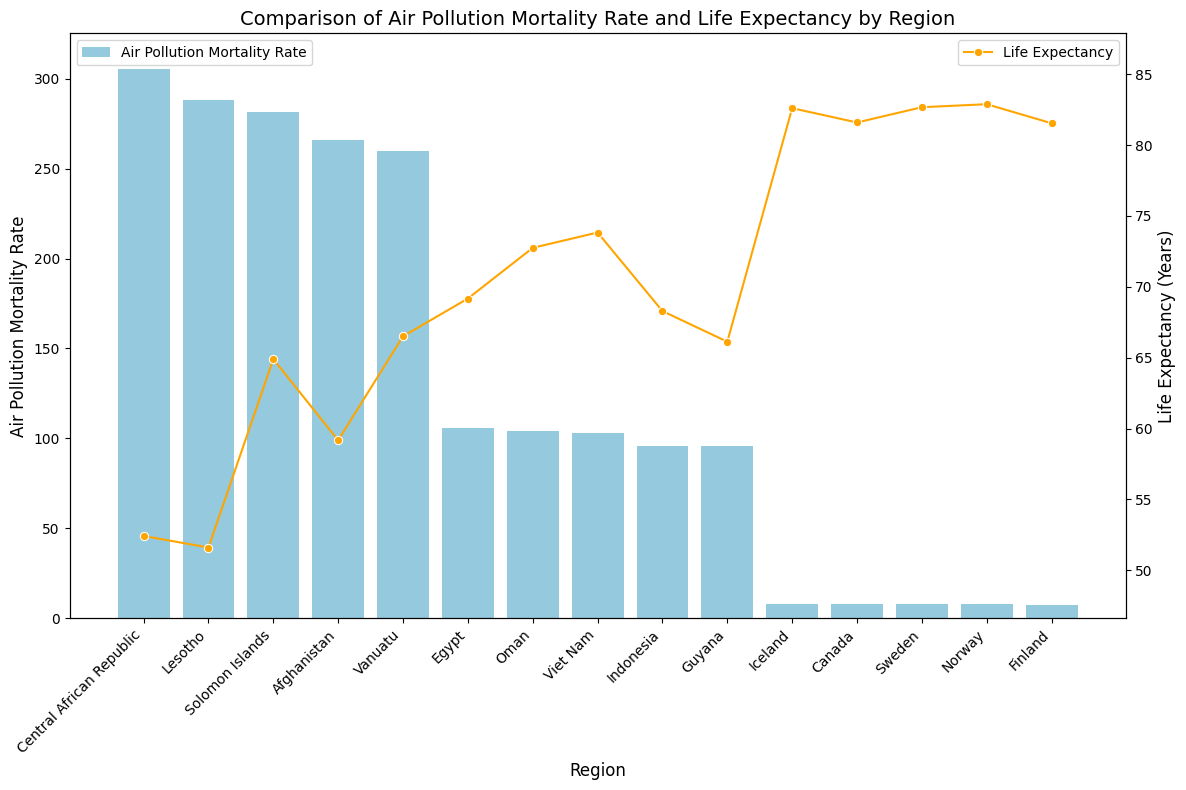

In [ ]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting a bar chart
sns.barplot(
    x='Region',
    y='Air Pollution Mortality Rate',
    data=relevant_data,
    ax=ax1,
    color='skyblue',
    label='Air Pollution Mortality Rate'
)

# Plotting a line plot
ax2 = ax1.twinx()
sns.lineplot(
    x='Region',
    y='Life Expectancy',
    data=relevant_data,
    ax=ax2,
    color='orange',
    marker='o',
    label='Life Expectancy'
)

# Setting Y-Axis Limits
ax1.set_ylim(0, relevant_data['Air Pollution Mortality Rate'].max() + 20)
ax2.set_ylim(relevant_data['Life Expectancy'].min() - 5, relevant_data['Life Expectancy'].max() + 5)

# Adjusting X-Axis Ticks
tick_positions = ax1.get_xticks()
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(relevant_data['Region'], rotation=45, ha='right')

# Adding Labels, Legends, and Title
ax1.set_ylabel('Air Pollution Mortality Rate', fontsize=12)
ax2.set_ylabel('Life Expectancy (Years)', fontsize=12)
ax1.set_xlabel('Region', fontsize=12)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparison of Air Pollution Mortality Rate and Life Expectancy by Region', fontsize=14)

# Displaying the Plot
plt.tight_layout()
plt.show()


**Answers :**
Central African Republic and Lesotho, which have the highest mortality rates (305 and 288 deaths per 100,000 population respectively), exhibit significantly lower life expectancy (52.4 and 51.6 years). This suggests that air pollution is a major driver of poor health outcomes in these regions.

In contrast, regions like Iceland, Canada, and Sweden, with mortality rates as low as ~8 deaths per 100,000 population, enjoy much higher life expectancy, exceeding 80 years. These regions likely benefit from better environmental conditions, healthcare systems, and infrastructure.

Regions with lower air pollution mortality rates tend to have better public health outcomes, reflected in longer life expectancy. This contrast underscores the adverse impact of air pollution on public health and highlights the importance of addressing environmental factors to improve life expectancy and overall well-being.

###Q2. Which countries or regions have the highest annual mean concentrations of PM2.5, and how does this correlate wit their life expectancy?

Firstly, two key indicators are defined for the analysis:

**PM2.5 Concentration:** This indicates the annual mean concentration of fine particulate matter in urban areas, measured in micrograms per cubic meter (µg/m³).

**Mortality Rate:** This represents the number of deaths attributed to air pollution per 100,000 people.

These indicators help establish the relationship between air pollution levels and their impact on public health across different regions.

Here also include appropriate data aggregation and group operations

In [ ]:
# Inspect column names in the pivoted dataset
pivot_data = filtered_data.pivot_table(
    index=['DIM_GEO_NAME', 'DIM_TIME_YEAR'],
    columns='IND_NAME',
    values='VALUE_NUMERIC',
    aggfunc='mean'
).reset_index()
pivot_data.columns = ['Region', 'Year'] + [col for col in pivot_data.columns if col not in ['DIM_GEO_NAME', 'DIM_TIME_YEAR']]

print(pivot_data.columns)

Index(['Region', 'Year',
       'Age-standardized mortality rate attributed to household and ambient air pollution  (per 100 000 population) ',
       'Amount of water- and sanitation-related official development assistance that is part of a government-coordinated spending plan (constant 2020 US$ millions)',
       'Annual mean concentrations of fine particulate matter (PM2.5) in urban areas (µg/m3)',
       'Healthy life expectancy at birth (years)',
       'Life expectancy at birth (years)',
       'Proportion of population using a hand-washing facility with soap and water (%)',
       'Proportion of population using safely-managed drinking-water services (%)',
       'Proportion of population using safely-managed sanitation services (%)'],
      dtype='object')


In [ ]:
# Define the columns for PM2.5 and the outcome variable (mortality rate)
pm25_column = 'Annual mean concentrations of fine particulate matter (PM2.5) in urban areas (µg/m3)'
outcome_column = 'Age-standardized mortality rate attributed to household and ambient air pollution  (per 100 000 population) '

# Ensure the required columns are in the dataset
if pm25_column not in pivot_data.columns or outcome_column not in pivot_data.columns:
    raise ValueError("The required columns for analysis are not in the dataset.")


In [ ]:
# Filter for the most recent year's data for each region
latest_data = pivot_data.sort_values('Year').groupby('Region').last()

# Select PM2.5 and mortality rate data
analysis_data = latest_data[[pm25_column, outcome_column]].dropna()

# Show top 10 regions with highest PM2.5 levels
top_pm25 = analysis_data.nlargest(10, pm25_column)
print("Top 10 regions with highest PM2.5 levels:")
print(top_pm25)

Top 10 regions with highest PM2.5 levels:
              Annual mean concentrations of fine particulate matter (PM2.5) in urban areas (µg/m3)  \
Region                                                                                               
Afghanistan                                           75.187180                                      
Kuwait                                                67.222862                                      
Egypt                                                 64.103241                                      
Cameroon                                              61.631409                                      
Saudi Arabia                                          60.727440                                      
Qatar                                                 59.961590                                      
Tajikistan                                            56.796280                                      
Niger                                   

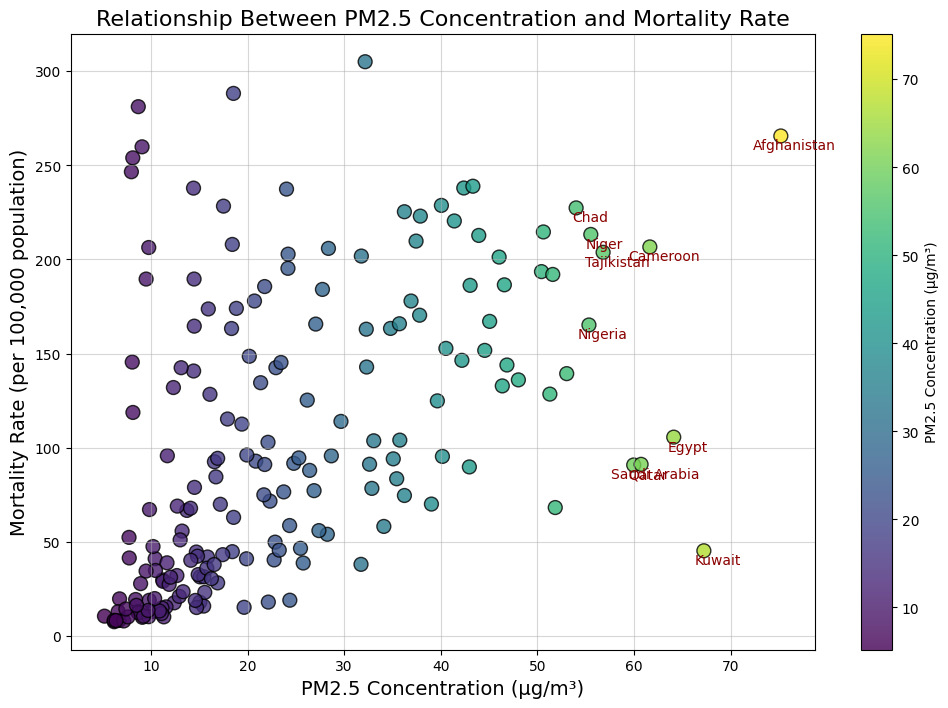

In [ ]:
# Enhanced scatter plot with color coding for better visualization
plt.figure(figsize=(12, 8))

# Create scatter plot with a color map
scatter = plt.scatter(
    analysis_data[pm25_column],
    analysis_data[outcome_column],
    c=analysis_data[pm25_column],  # Color by PM2.5 levels
    cmap='viridis',  # Color map
    alpha=0.8,
    edgecolor='k',
    s=100
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('PM2.5 Concentration (µg/m³)')

# Add labels and title
plt.xlabel('PM2.5 Concentration (µg/m³)', fontsize=14)
plt.ylabel('Mortality Rate (per 100,000 population)', fontsize=14)
plt.title('Relationship Between PM2.5 Concentration and Mortality Rate', fontsize=16)

# Highlight regions with the highest PM2.5 levels
top_pm25_regions = top_pm25.index  # Names of top regions
for region in top_pm25_regions:
    row = latest_data.loc[region]
    plt.annotate(
        region,
        (row[pm25_column], row[outcome_column]),
        textcoords="offset points",
        xytext=(10, -10),
        ha='center',
        fontsize=10,
        color='darkred'
    )

# Display the plot
plt.grid(alpha=0.5)
plt.show()


**Answer:**
The graph highlights a significant relationship between PM2.5 concentration and mortality rates across various countries. Higher PM2.5 levels, as seen in Afghanistan and Chad, correlate with elevated mortality rates, emphasizing the detrimental effects of air pollution on public health. For example, Afghanistan's PM2.5 concentration exceeds 70 µg/m³, leading to increased mortality rates.

In contrast, countries like Saudi Arabia and Kuwait, which report lower PM2.5 levels, have substantially reduced mortality rates. This indicates that effective air quality management and sound environmental policies play a crucial role in enhancing health outcomes.

Overall, the data clearly demonstrates that regions with higher PM2.5 concentrations face poorer health outcomes, reinforcing the urgent need for targeted interventions to mitigate air pollution and promote better public health. Addressing these environmental challenges is essential for improving population health and ensuring a healthier future.

###Q3 - Which countries or regions have the lowest proportion of the population using safely managed drinking-water services, and how does this affect mortality rates?


1. Filtering for Drinking Water and Mortality Data

    This step extracts the relevant data from the dataset.

    - We assume that the column IND_NAME contains descriptive names of indicators. By searching for keywords like "drinking-water" and "mortality", we isolate data related to water access and mortality rates.
    - The case=False ensures that the filtering is case-insensitive.

Here also include appropriate data aggregation and group operations

In [ ]:
# Filter for the 'safely managed drinking-water services' indicator (assuming "drinking-water" appears in IND_NAME)
drinking_water_data = df[df['IND_NAME'].str.contains("drinking-water", case=False)]

# Filter for the mortality rate data (assuming "mortality" appears in IND_NAME)
mortality_data = df[df['IND_NAME'].str.contains("mortality", case=False)]

2. Selecting relevant columns

    After filtering the data, we select only the essential columns for analysis:

    - DIM_GEO_NAME for the country/region name.
    - DIM_TIME_YEAR for the year of data collection.
    - VALUE_NUMERIC for the actual numeric values of the indicators (proportion of drinking water access or mortality rate).

In [ ]:
# Ensure both datasets have a matching 'DIM_GEO_NAME' (country) and 'DIM_TIME_YEAR' columns
drinking_water_data = drinking_water_data[['DIM_GEO_NAME', 'DIM_TIME_YEAR', 'VALUE_NUMERIC']]
mortality_data = mortality_data[['DIM_GEO_NAME', 'DIM_TIME_YEAR', 'VALUE_NUMERIC']]

3. Merge to analyze the relationship between water access and mortality for the same country and year.

    Combine the drinking water data and mortality data into a single dataset using the pd.merge function.

    - The merge is performed on DIM_GEO_NAME (to match countries) and DIM_TIME_YEAR (to match the year).
    - The suffixes=('_water', '_mortality') adds unique suffixes to distinguish between the two VALUE_NUMERIC columns in the merged dataset.

In [ ]:
# Merge the two datasets on 'DIM_GEO_NAME' and 'DIM_TIME_YEAR'
merged_data = pd.merge(drinking_water_data, mortality_data, on=['DIM_GEO_NAME', 'DIM_TIME_YEAR'], suffixes=('_water', '_mortality'))

4. Identifying Countries with the Lowest Water Access
    identify countries or regions with the lowest levels of access to safely managed drinking water.

In [ ]:
# Find countries/regions with the lowest proportion of the population
lowest_water_access = merged_data.groupby('DIM_GEO_NAME')['VALUE_NUMERIC_water'].min().sort_values(ascending=True)
print("Countries/Regions with the lowest water access:\n", lowest_water_access.head())

Countries/Regions with the lowest water access:
 DIM_GEO_NAME
Central African Republic        6.12644
Chad                            6.24705
Tuvalu                          8.70710
Sierra Leone                   10.26242
United Republic of Tanzania    11.33565
Name: VALUE_NUMERIC_water, dtype: float64


5. Extracting Mortality Rates for These Countries

In [ ]:
# Identify the corresponding mortality rates for these countries
lowest_water_mortality = merged_data[merged_data['DIM_GEO_NAME'].isin(lowest_water_access.head().index)]
lowest_water_mortality = lowest_water_mortality[['DIM_GEO_NAME', 'VALUE_NUMERIC_water', 'VALUE_NUMERIC_mortality']]

# Display the countries with the lowest water access and their mortality rates
print("Countries with lowest water access and their corresponding mortality rates:\n", lowest_water_mortality)

Countries with lowest water access and their corresponding mortality rates:
                     DIM_GEO_NAME  VALUE_NUMERIC_water  VALUE_NUMERIC_mortality
36      Central African Republic              6.12644                31.721640
37      Central African Republic              6.12644                96.781883
38                          Chad              6.24705                31.635269
39                          Chad              6.24705               102.856300
206                 Sierra Leone             10.26242                30.835320
207                 Sierra Leone             10.26242               100.846603
234                       Tuvalu              8.70710                 9.092730
235                       Tuvalu              8.70710                20.371920
242  United Republic of Tanzania             11.33565                19.606119
243  United Republic of Tanzania             11.33565                40.511250


6. Visualizing the Relationship

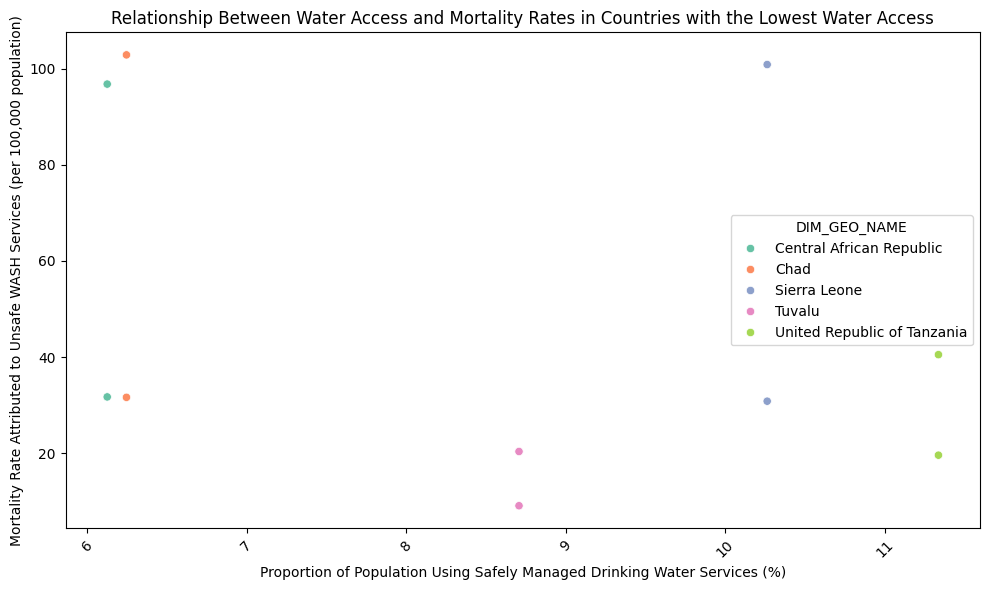

In [ ]:
# Visualize the relationship between water access and mortality rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lowest_water_mortality, x='VALUE_NUMERIC_water', y='VALUE_NUMERIC_mortality', hue='DIM_GEO_NAME', palette='Set2')
plt.title('Relationship Between Water Access and Mortality Rates in Countries with the Lowest Water Access')
plt.xlabel('Proportion of Population Using Safely Managed Drinking Water Services (%)')
plt.ylabel('Mortality Rate Attributed to Unsafe WASH Services (per 100,000 population)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Q4. What is the relationship between access to clean water and sanitation services and life expectancy at birth across different regions?


This question explores whether regions with higher access to clean water and sanitation services tend to have better public health outcomes, as measured by life expectancy.

Firstly, three indicators that are essential to the analysis  are defined:
  - Proportion of population using safely-managed drinking-water services (%)
  - Proportion of population using safely-managed sanitation services (%)
  - Life expectancy at birth (years)

The dataset is filtered to include only the relevant indicators for the analysis, which are "Proportion of population using safely-managed drinking-water services (%)", "Proportion of population using safely-managed sanitation services (%)", and "Life expectancy at birth (years)". This ensures the focus is on the required data for further analysis.

Here also include appropriate data aggregation and group operations

In [ ]:
# Relevant indicators for the research question
relevant_indicators = [
    "Proportion of population using safely-managed drinking-water services (%)",
    "Proportion of population using safely-managed sanitation services (%)",
    "Life expectancy at birth (years)"
]

# Filter the dataset to include rows with relevant indicators
filtered_data3 = filtered_data[filtered_data['IND_NAME'].isin(relevant_indicators)]
filtered_data3.head()

,IND_NAME,DIM_GEO_NAME,IND_CODE,DIM_GEO_CODE,DIM_TIME_YEAR,DIM_1_CODE,VALUE_NUMERIC,VALUE_STRING,VALUE_COMMENTS
19,Life expectancy at birth (years),Afghanistan,WHOSIS_0001,AFG,2021,SEX_BTSX,59.126904,59.1,UNKNOWN
20,Life expectancy at birth (years),Afghanistan,WHOSIS_0001,AFG,2021,SEX_FMLE,60.986038,61.0,UNKNOWN
21,Life expectancy at birth (years),Afghanistan,WHOSIS_0001,AFG,2021,SEX_MLE,57.403782,57.4,UNKNOWN
44,Proportion of population using safely-managed ...,Afghanistan,WSH_WATER_SAFELY_MANAGED,AFG,2022,UNSPECIFIED,30.034100,30.0,UNKNOWN
75,Life expectancy at birth (years),African Region,WHOSIS_0001,AFR,2021,SEX_MLE,61.741306,61.7,UNKNOWN


A pivot table is created to aggregate the data, grouping it by the region (DIM_GEO_NAME) and calculating the mean values for the selected indicators (drinking water access, sanitation access, and life expectancy). This step ensures that the data is summarized at the regional level and provides a cleaner structure for further analysis.



In [ ]:
# Pivot the dataset to create a summary table
water_sanitation_summary = filtered_data3.pivot_table(
    index=['DIM_GEO_NAME'],
    columns='IND_NAME',
    values='VALUE_NUMERIC',
    aggfunc='mean'
).reset_index()
print(water_sanitation_summary.head())

IND_NAME    DIM_GEO_NAME  Life expectancy at birth (years)  \
0            Afghanistan                         59.172241   
1         African Region                         63.555041   
2                Albania                         76.454702   
3                Algeria                         76.040944   
4                Andorra                               NaN   

IND_NAME  Proportion of population using safely-managed drinking-water services (%)  \
0                                                 30.034100                           
1                                                 33.264332                           
2                                                 70.736069                           
3                                                 70.597931                           
4                                                 90.639999                           

IND_NAME  Proportion of population using safely-managed sanitation services (%)  
0                     

After pivoting, the columns are renamed for clarity. This step is not strictly aggregation, but it helps to make the data more readable.

To ensure clean data for analysis, rows with missing values are removed. This step is part of data cleaning, preparing the dataset for accurate aggregation and visualization.

In [ ]:
# Rename columns for clarity
water_sanitation_summary.columns = [
    'Region',
    'Drinking Water Access (%)',
    'Sanitation Access (%)',
    'Life Expectancy (Years)'
]

# Drop rows with missing values
water_sanitation_summary.dropna(inplace=True)
print(water_sanitation_summary.head())

            Region  Drinking Water Access (%)  Sanitation Access (%)  \
1   African Region                  63.555041              33.264332   
2          Albania                  76.454702              70.736069   
3          Algeria                  76.040944              70.597931   
8          Armenia                  72.818771              82.411720   
10         Austria                  80.985227              98.896317   

    Life Expectancy (Years)  
1                 25.602880  
2                 56.346489  
3                 62.410099  
8                 10.753110  
10                99.671982  


The analysis focuses on regions with either the highest or lowest life expectancy. The dataset is filtered to include only these regions by comparing the life expectancy values to the 90th and 10th percentiles. This ensures a focused analysis on extreme values of life expectancy, which can offer valuable insights.


In [ ]:
# Select only regions with high or low life expectancy for a focused analysis
selected_regions = water_sanitation_summary[
    (water_sanitation_summary['Life Expectancy (Years)'] > water_sanitation_summary['Life Expectancy (Years)'].quantile(0.9)) |
    (water_sanitation_summary['Life Expectancy (Years)'] < water_sanitation_summary['Life Expectancy (Years)'].quantile(0.1))
]

The visualization uses a grouped bar plot to compare drinking water and sanitation access across regions.The grouped bar plot is appropriate for visualizing these two related indicators side by side for each region, allowing for easy comparison. Each region is represented by two bars: one for drinking water access and one for sanitation access, with different colors.

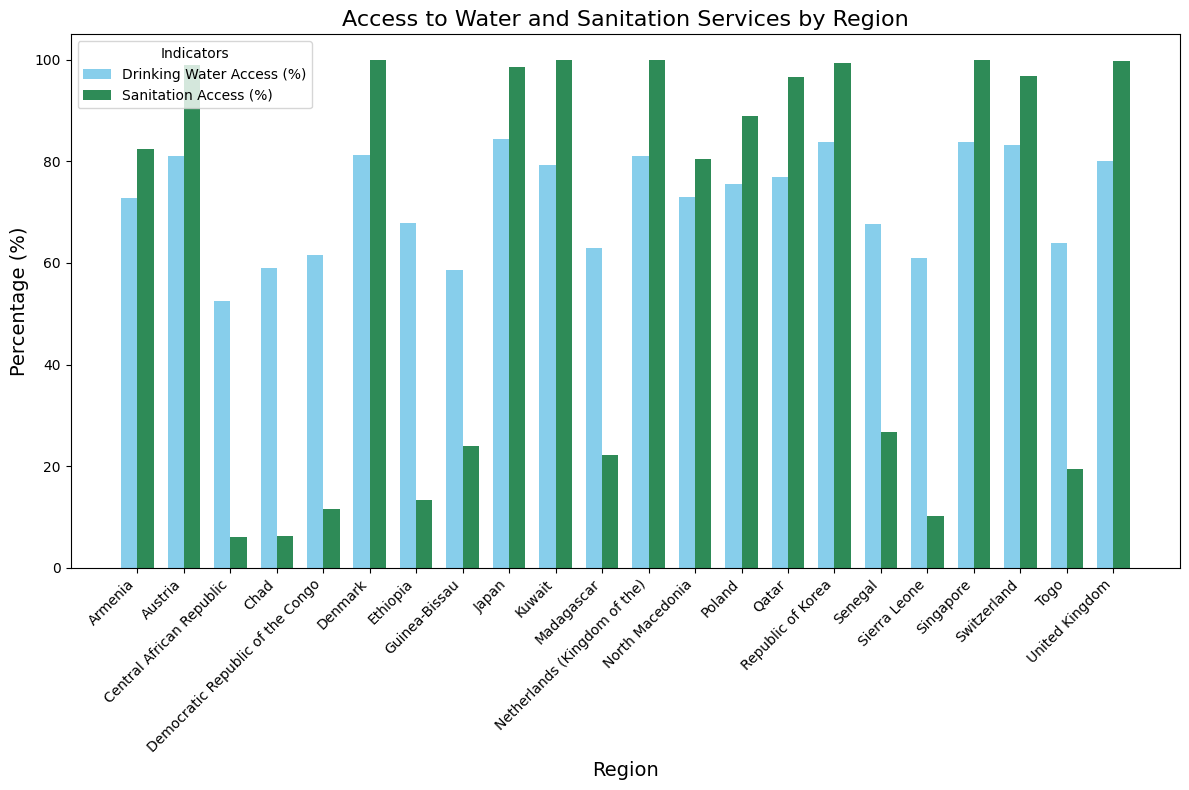

In [ ]:
# Visualize the relationship using a grouped bar plot
plt.figure(figsize=(12, 8))

# Create grouped bar plot
x = range(len(selected_regions))
bar_width = 0.35

plt.bar(
    x,
    selected_regions['Drinking Water Access (%)'],
    color='skyblue',
    width=bar_width,
    label='Drinking Water Access (%)'
)

plt.bar(
    [i + bar_width for i in x],
    selected_regions['Sanitation Access (%)'],
    color='seagreen',
    width=bar_width,
    label='Sanitation Access (%)'
)

# Add labels, legend, and title
plt.title('Access to Water and Sanitation Services by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], selected_regions['Region'], rotation=45, ha='right')
plt.legend(title='Indicators', loc='upper left')

plt.tight_layout()
plt.show()


From the plot, we can observe that regions with higher access to **drinking water** and **sanitation services** tend to have higher **life expectancy**. Regions with low access to these services show lower life expectancy, suggesting a positive relationship between access to clean water, sanitation, and improved health outcomes. This indicates that improving access to basic water and sanitation services could potentially lead to better life expectancy outcomes across regions.

## **Machine Learning** : How will improvements in air quality, hand washing, sanitation access and clean water availability impact life expectancy in the next decade?




Check for the available columns that include in filtered data file

> Here also include appropriate data aggregation and group operations



In [ ]:
print("Available columns:", filtered_data.columns)


Available columns: Index(['IND_NAME', 'DIM_GEO_NAME', 'IND_CODE', 'DIM_GEO_CODE', 'DIM_TIME_YEAR',
       'DIM_1_CODE', 'VALUE_NUMERIC', 'VALUE_STRING', 'VALUE_COMMENTS'],
      dtype='object')


Check for the available rows that include in filtered data file

In [ ]:
print(filtered_data['IND_NAME'].unique())


['Age-standardized mortality rate attributed to household and ambient air pollution  (per 100 000 population) '
 'Amount of water- and sanitation-related official development assistance that is part of a government-coordinated spending plan (constant 2020 US$ millions)'
 'Annual mean concentrations of fine particulate matter (PM2.5) in urban areas (µg/m3)'
 'Healthy life expectancy at birth (years)'
 'Life expectancy at birth (years)'
 'Proportion of population using a hand-washing facility with soap and water (%)'
 'Proportion of population using safely-managed drinking-water services (%)'
 'Proportion of population using safely-managed sanitation services (%)']


Define function to get latest year's data for each country

In [ ]:
def get_latest_value(df, indicator):
    # Use regex=False to treat the indicator as a literal string
    mask = df['IND_NAME'].str.contains(indicator, case=False, na=False, regex=False)
    temp = df[mask].copy()
    if not temp.empty:
        latest_data = temp.sort_values('DIM_TIME_YEAR', ascending=False).groupby('DIM_GEO_NAME').first()
        return pd.Series(latest_data['VALUE_NUMERIC'], index=latest_data.index)
    return pd.Series(dtype='float64')


Extract the relevant indicators

In [ ]:
life_expectancy = get_latest_value(filtered_data, 'Healthy life expectancy at birth')
air_pollution = get_latest_value(filtered_data, 'Age-standardized mortality rate attributed to household and ambient air pollution ')
pm25 = get_latest_value(filtered_data, 'Annual mean concentrations of fine particulate matter (PM2.5) in urban areas')
sanitation = get_latest_value(filtered_data, 'Proportion of population using safely-managed sanitation services')
clean_water = get_latest_value(filtered_data, 'Proportion of population using safely-managed drinking-water services')
hand_washing = get_latest_value(filtered_data, 'Proportion of population using a hand-washing facility with soap and water')

Create analysis dataframe and again remove any rows with missing values

In [ ]:

# Create analysis dataframe
analysis_df = pd.DataFrame({
    'Life_Expectancy': life_expectancy,
    'Air_Pollution': air_pollution,
    'PM2.5': pm25,
    'Sanitation': sanitation,
    'Clean_Water': clean_water,
    'Hand_Washing': hand_washing
})

# Remove any rows with missing values
analysis_df = analysis_df.dropna()


Check for dataset shape after the cleaning part

In [ ]:
print("Dataset shape after cleaning:", analysis_df.shape)
print("\
Sample of the prepared dataset:")
print(analysis_df.head())

Dataset shape after cleaning: (50, 6)
Sample of the prepared dataset:
                Life_Expectancy  Air_Pollution      PM2.5  Sanitation  \
DIM_GEO_NAME                                                            
African Region        54.617283     163.353149  34.798248   25.602880   
Algeria               65.548195      49.746521  22.854980   62.410099   
Armenia               61.477097      74.548347  36.237221   10.753110   
Bahrain               64.838249      68.137413  51.843311   92.228752   
Bangladesh            63.051189     143.916916  46.845348   30.976191   

                Clean_Water  Hand_Washing  
DIM_GEO_NAME                               
African Region    33.264332     25.534861  
Algeria           70.597931     84.804100  
Armenia           82.411720     94.423660  
Bahrain           98.903976    100.000000  
Bangladesh        59.109299     61.728539  


Prepare features and target data
Group by relevant dimensions

In [ ]:
X = analysis_df[['Air_Pollution', 'PM2.5', 'Sanitation', 'Clean_Water', 'Hand_Washing']]
y = analysis_df['Life_Expectancy']

Scale features and Split the data into training and testing sets

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Initialize linear regression model

In [ ]:
lr_model = LinearRegression()


Train the linear regression model on the training data

In [ ]:
lr_model.fit(X_train, y_train)


LinearRegression()

Get predictions

In [ ]:
lr_pred = lr_model.predict(X_test)


Calculate model performance

In [ ]:
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression Model Performance Metrics:")
print(f"R² Score: {lr_r2:.3f}")
print(f"RMSE: {lr_rmse:.3f}")

Linear Regression Model Performance Metrics:
R² Score: 0.596
RMSE: 3.089


Define scenarios for the next 10 years

In [ ]:
scenarios = {
    'Baseline': analysis_df.copy(),
    'Improve Air Pollution by 10%': analysis_df.copy().assign(Air_Pollution=analysis_df['Air_Pollution'] * 0.9),
    'Improve Sanitation by 10%': analysis_df.copy().assign(Sanitation=analysis_df['Sanitation'] * 1.1),
    'Improve Clean Water by 10%': analysis_df.copy().assign(Clean_Water=analysis_df['Clean_Water'] * 1.1),
    'Improve Hand Washing by 10%': analysis_df.copy().assign(Hand_Washing=analysis_df['Hand_Washing'] * 1.1),
}

Calculate baseline prediction

In [ ]:
baseline_scaled = pd.DataFrame(
    scaler.transform(scenarios['Baseline'][['Air_Pollution', 'PM2.5', 'Sanitation', 'Clean_Water', 'Hand_Washing']]),
    columns=['Air_Pollution', 'PM2.5', 'Sanitation', 'Clean_Water', 'Hand_Washing'],
    index=scenarios['Baseline'].index
)
baseline_prediction = lr_model.predict(baseline_scaled)

Calculate average changes compared to baseline

In [ ]:
average_changes = {}
for scenario_name, scenario_data in scenarios.items():
    scenario_scaled = pd.DataFrame(
        scaler.transform(scenario_data[['Air_Pollution', 'PM2.5', 'Sanitation', 'Clean_Water', 'Hand_Washing']]),
        columns=['Air_Pollution', 'PM2.5', 'Sanitation', 'Clean_Water', 'Hand_Washing'],
        index=scenario_data.index
    )
    scenario_prediction = lr_model.predict(scenario_scaled)
    average_changes[scenario_name] = np.mean(scenario_prediction - baseline_prediction)

Print average changes

In [ ]:
print("\nAverage Changes in Life Expectancy Compared to Baseline:")
for scenario, change in average_changes.items():
    print(f"{scenario}: {change:.2f} years")

# Remove the Baseline from the average_changes dictionary for visualization
average_changes_no_baseline = {
    scenario: change for scenario, change in average_changes.items() if scenario != "Baseline"
}


Average Changes in Life Expectancy Compared to Baseline:
Baseline: 0.00 years
Improve Air Pollution by 10%: 0.42 years
Improve Sanitation by 10%: 0.01 years
Improve Clean Water by 10%: 0.26 years
Improve Hand Washing by 10%: 0.24 years


Visualize average changes in slope chart

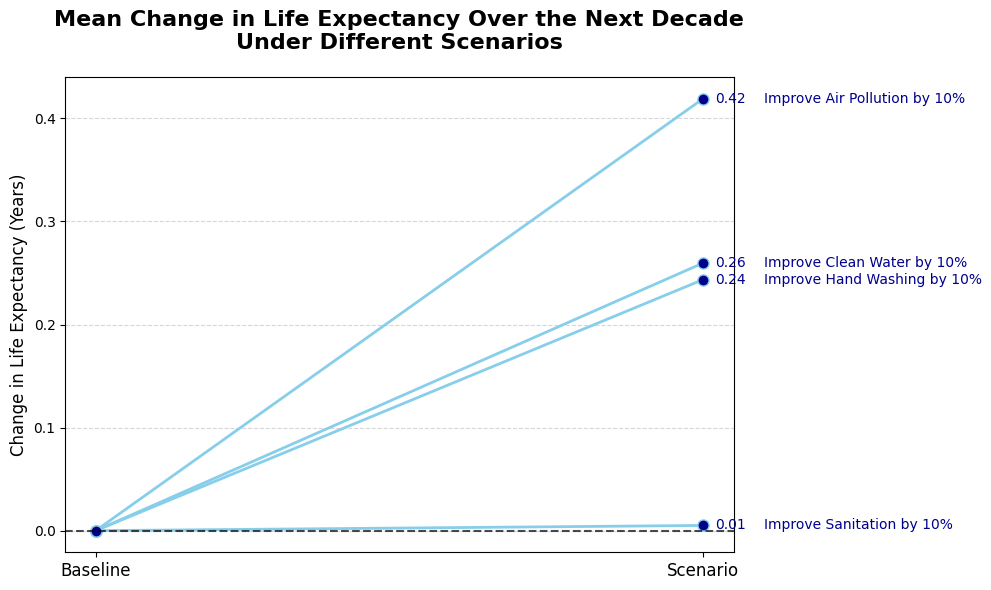

In [ ]:
# Sort scenarios by change in life expectancy (descending order)
sorted_scenarios = sorted(average_changes_no_baseline.items(), key=lambda item: item[1], reverse=True)
scenario_names = [scenario[0] for scenario in sorted_scenarios]
changes = [scenario[1] for scenario in sorted_scenarios]

# Create a slope chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define positions for the scenario labels on the x-axis
x_positions = [0, 1]  # Two positions: "Baseline" and "Scenario"

# Plot lines connecting baseline to scenario values
for i, (scenario, change) in enumerate(zip(scenario_names, changes)):
    ax.plot(x_positions, [0, change], color='skyblue', linewidth=2, marker='o', markersize=8, markerfacecolor='darkblue')  # Connect baseline to scenario
    ax.text(x_positions[1] + 0.02, change, f'{change:.2f}', ha='left', va='center', color='darkblue', fontsize=10)  # Add value annotation

# Customize the plot for better readability and visual appeal
ax.set_xticks(x_positions)
ax.set_xticklabels(['Baseline', 'Scenario'], fontsize=12)  # Set x-axis labels
ax.set_ylabel('Change in Life Expectancy (Years)', fontsize=12)
ax.set_title('Mean Change in Life Expectancy Over the Next Decade\nUnder Different Scenarios', fontsize=16, fontweight='bold', pad=20)
ax.axhline(0, color='black', linestyle='--', alpha=0.7)  # Add a horizontal line at zero for reference
ax.grid(axis='y', linestyle='--', alpha=0.5)  # Add gridlines for better readability

# Add scenario labels to the right side of the chart
for i, scenario in enumerate(scenario_names):
    ax.text(x_positions[1] + 0.1, changes[i], scenario, ha='left', va='center', color='darkblue', fontsize=10)

# Adding some whitespace and better layout management
plt.subplots_adjust(right=0.75)
plt.tight_layout()
plt.savefig('life_expectancy_changes.png', format='png', dpi=300)
plt.show()


**Answer :** The findings highlight air quality improvement as the most impactful intervention, with significant gains also achieved through better access to clean water and hygiene. While sanitation improvements show a smaller immediate effect on life expectancy, they remain essential for broader health benefits. These insights emphasize the importance of multi-faceted strategies to enhance public health outcomes over the next decade.

# **Analysis and Conclusion**

## 1. **Research Question 1**

###**Analysis**

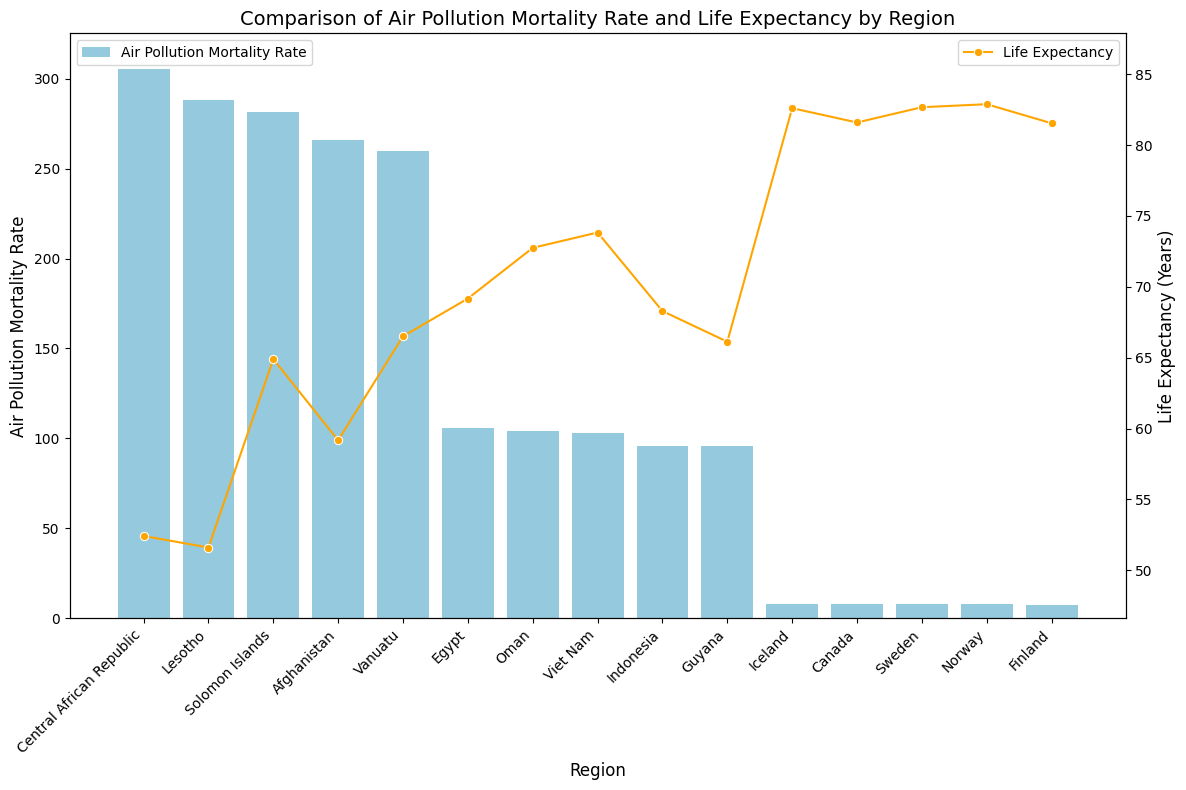

- Central African Republic (305) and Lesotho (288) have the highest air pollution-related mortality rates.
- These regions show significantly low life expectancy, approximately 52.4 years and 51.6 years, respectively.
- The correlation suggests a strong negative impact of air pollution on public health outcomes.

- Regions like Vanuatu (259) and Afghanistan (265) have relatively moderate mortality rates.
- Their life expectancy ranges from 59 to 66 years, reflecting an intermediate level of public health conditions.

- Regions such as Iceland (8), Canada (8.1), and Sweden (8.07) have the lowest air pollution-related mortality rates.
- These regions enjoy exceptionally high life expectancy, above 80 years, indicating healthier living conditions and better public health systems.

- There is a negative correlation between air pollution mortality rates and life expectancy:
- Higher mortality rates → Lower life expectancy.
- Lower mortality rates → Higher life expectancy.

###**Conclusion**

The analysis underscores the significant impact of air pollution on public health outcomes, as evidenced by the inverse relationship between mortality rates and life expectancy.

Addressing air pollution through improved environmental policies and healthcare interventions is critical to enhancing public health, particularly in regions with high mortality rates.

This aligns with the broader theme of understanding the impact of environmental factors (air, water, and sanitation) on public health, emphasizing the urgent need for sustainable solutions.

## 2. **Research Question 2**

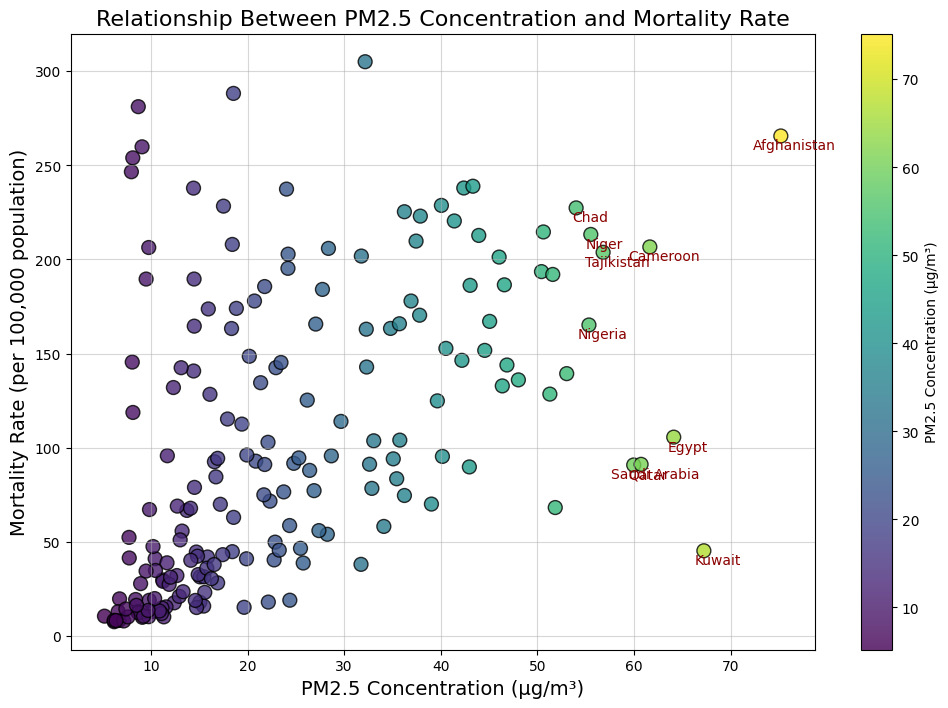

In [ ]:
# Enhanced scatter plot with color coding for better visualization
plt.figure(figsize=(12, 8))

# Create scatter plot with a color map
scatter = plt.scatter(
    analysis_data[pm25_column],
    analysis_data[outcome_column],
    c=analysis_data[pm25_column],  # Color by PM2.5 levels
    cmap='viridis',  # Color map
    alpha=0.8,
    edgecolor='k',
    s=100
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('PM2.5 Concentration (µg/m³)')

# Add labels and title
plt.xlabel('PM2.5 Concentration (µg/m³)', fontsize=14)
plt.ylabel('Mortality Rate (per 100,000 population)', fontsize=14)
plt.title('Relationship Between PM2.5 Concentration and Mortality Rate', fontsize=16)

# Highlight regions with the highest PM2.5 levels
top_pm25_regions = top_pm25.index  # Names of top regions
for region in top_pm25_regions:
    row = latest_data.loc[region]
    plt.annotate(
        region,
        (row[pm25_column], row[outcome_column]),
        textcoords="offset points",
        xytext=(10, -10),
        ha='center',
        fontsize=10,
        color='darkred'
    )

# Display the plot
plt.grid(alpha=0.5)
plt.show()

**Analysis of PM2.5 Concentration and Mortality Rates**

The graph illustrates a clear relationship between PM2.5 concentration and air pollution-related mortality rates. Afghanistan (265.66 deaths per 100,000 population) and Chad (approximately 200) exhibit high mortality rates that correlate with elevated PM2.5 levels. This suggests a strong negative impact of air pollution on public health outcomes.

Moderate mortality rates are observed in regions like Vanuatu (259 deaths per 100,000) and Cameroon, indicating that air quality significantly influences health outcomes.

In contrast, countries such as Iceland (8), Canada (8.1), and Sweden (8.07) showcase the lowest mortality rates associated with air pollution, reflecting healthier living conditions and robust public health systems.

**Key Observations:**

**Negative Correlation:** There exists a clear inverse relationship between air pollution mortality rates and public health outcomes:

Higher mortality rates → Higher PM2.5 concentration

Lower mortality rates → Lower PM2.5 concentration


**Conclusion**

The analysis underscores the significant impact of PM2.5 concentration on mortality rates, highlighting the urgent need for interventions to mitigate air pollution. Addressing these environmental challenges is crucial for improving public health, particularly in regions with high mortality rates. This emphasizes the importance of effective environmental policies and healthcare access in promoting healthier communities.

## 3. **Research Question 3**

###**Analysis**

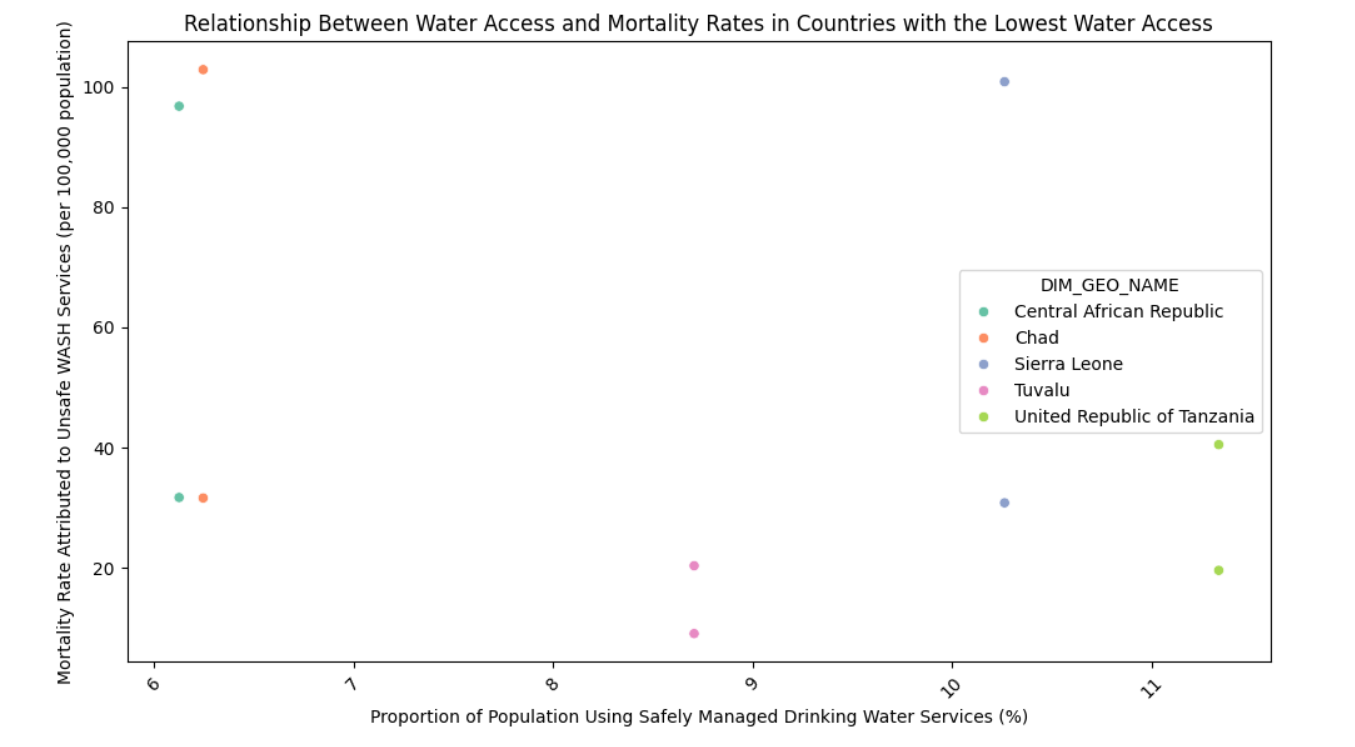

From the scatter plot, it is evident that:
- Countries with extremely low access to safely managed drinking-water services, such as Chad and Sierra Leone (6–10%), experience significantly higher mortality rates, exceeding 100 deaths per 100,000 population.
- Slightly higher access to drinking water, as seen in Tuvalu and the United Republic of Tanzania (8–11%), corresponds with much lower mortality rates, ranging from 9 to 20 deaths per 100,000.
- The Central African Republic exhibits moderate mortality rates compared to Chad, despite similar levels of water access, suggesting that other factors, such as sanitation infrastructure, healthcare quality, or education, may influence mortality outcomes.
- There is a clear negative correlation between access to drinking water and mortality rates, where better water access generally reduces mortality.

###**Conclusion**

This analysis highlights the critical link between access to safely managed drinking-water services and mortality rates attributed to unsafe WASH services. Countries with limited water access face higher risks of mortality, emphasizing the urgent need for targeted interventions to improve water accessibility. Additionally, the analysis suggests that addressing complementary factors such as sanitation, healthcare, and public health education is vital to mitigating mortality and enhancing overall public health outcomes in vulnerable regions.

## 4. **Research Question 4**

### **Analysis**

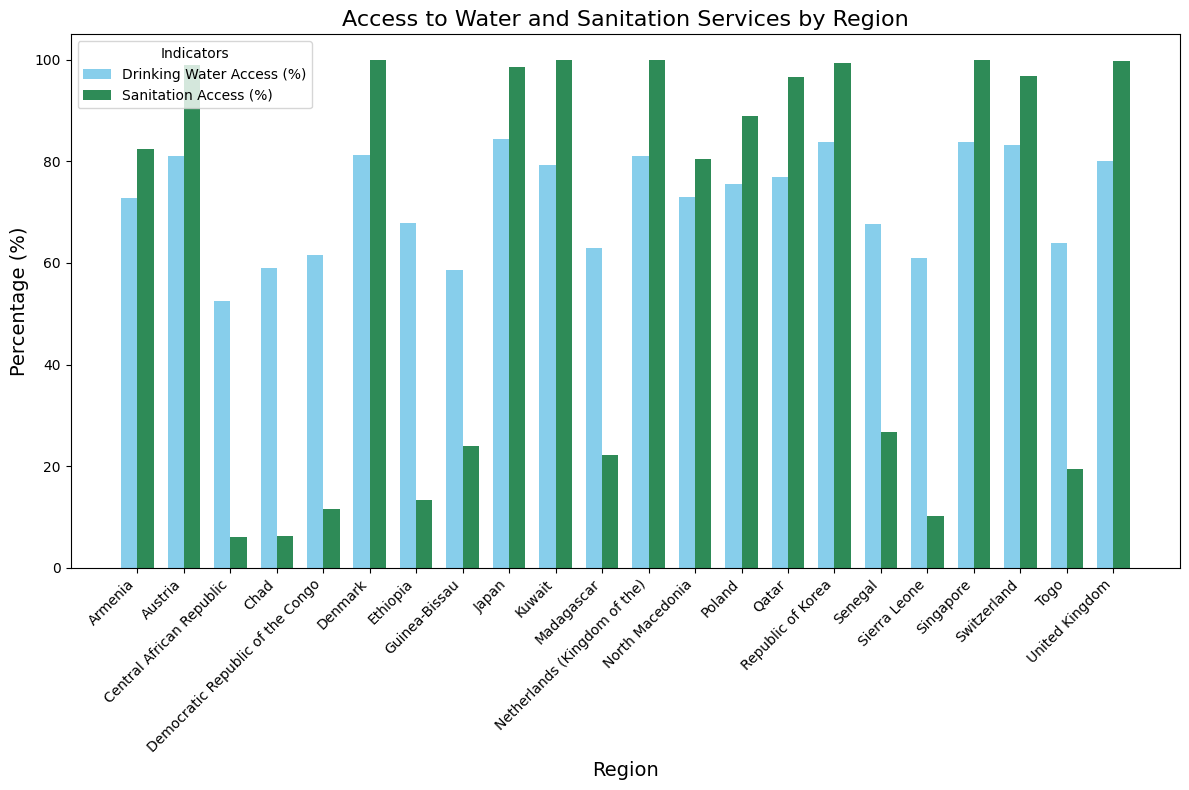

From the grouped bar plot, it is evident that:

*  Regions with high life expectancy tend to have greater access to drinking water and sanitation services, with percentages nearing universal coverage.
*  Regions with low life expectancy show limited access to these essential services, highlighting a gap in basic infrastructure.
* The plot illustrates a positive correlation between access to clean water and sanitation and improved health outcomes, as reflected in life expectancy.
*  This suggests that better access to these services directly reduces health risks, such as waterborne diseases, and contributes to overall longevity.














### **Conclusion**

The analysis demonstrates that increasing access to clean water and sanitation services is directly associated with improved life expectancy. This finding highlights the importance of investments in water and sanitation infrastructure as a vital public health strategy. Regions with greater access to these services not only enjoy better health outcomes but also demonstrate the significant role these services play in reducing mortality and improving quality of life.

To address disparities in life expectancy, governments and organizations must prioritize equitable access to clean water and sanitation, especially in regions currently underserved. By doing so, these efforts can contribute to significant improvements in global health and well-being.

## 5. **Machine Learning**

### **Analysis**

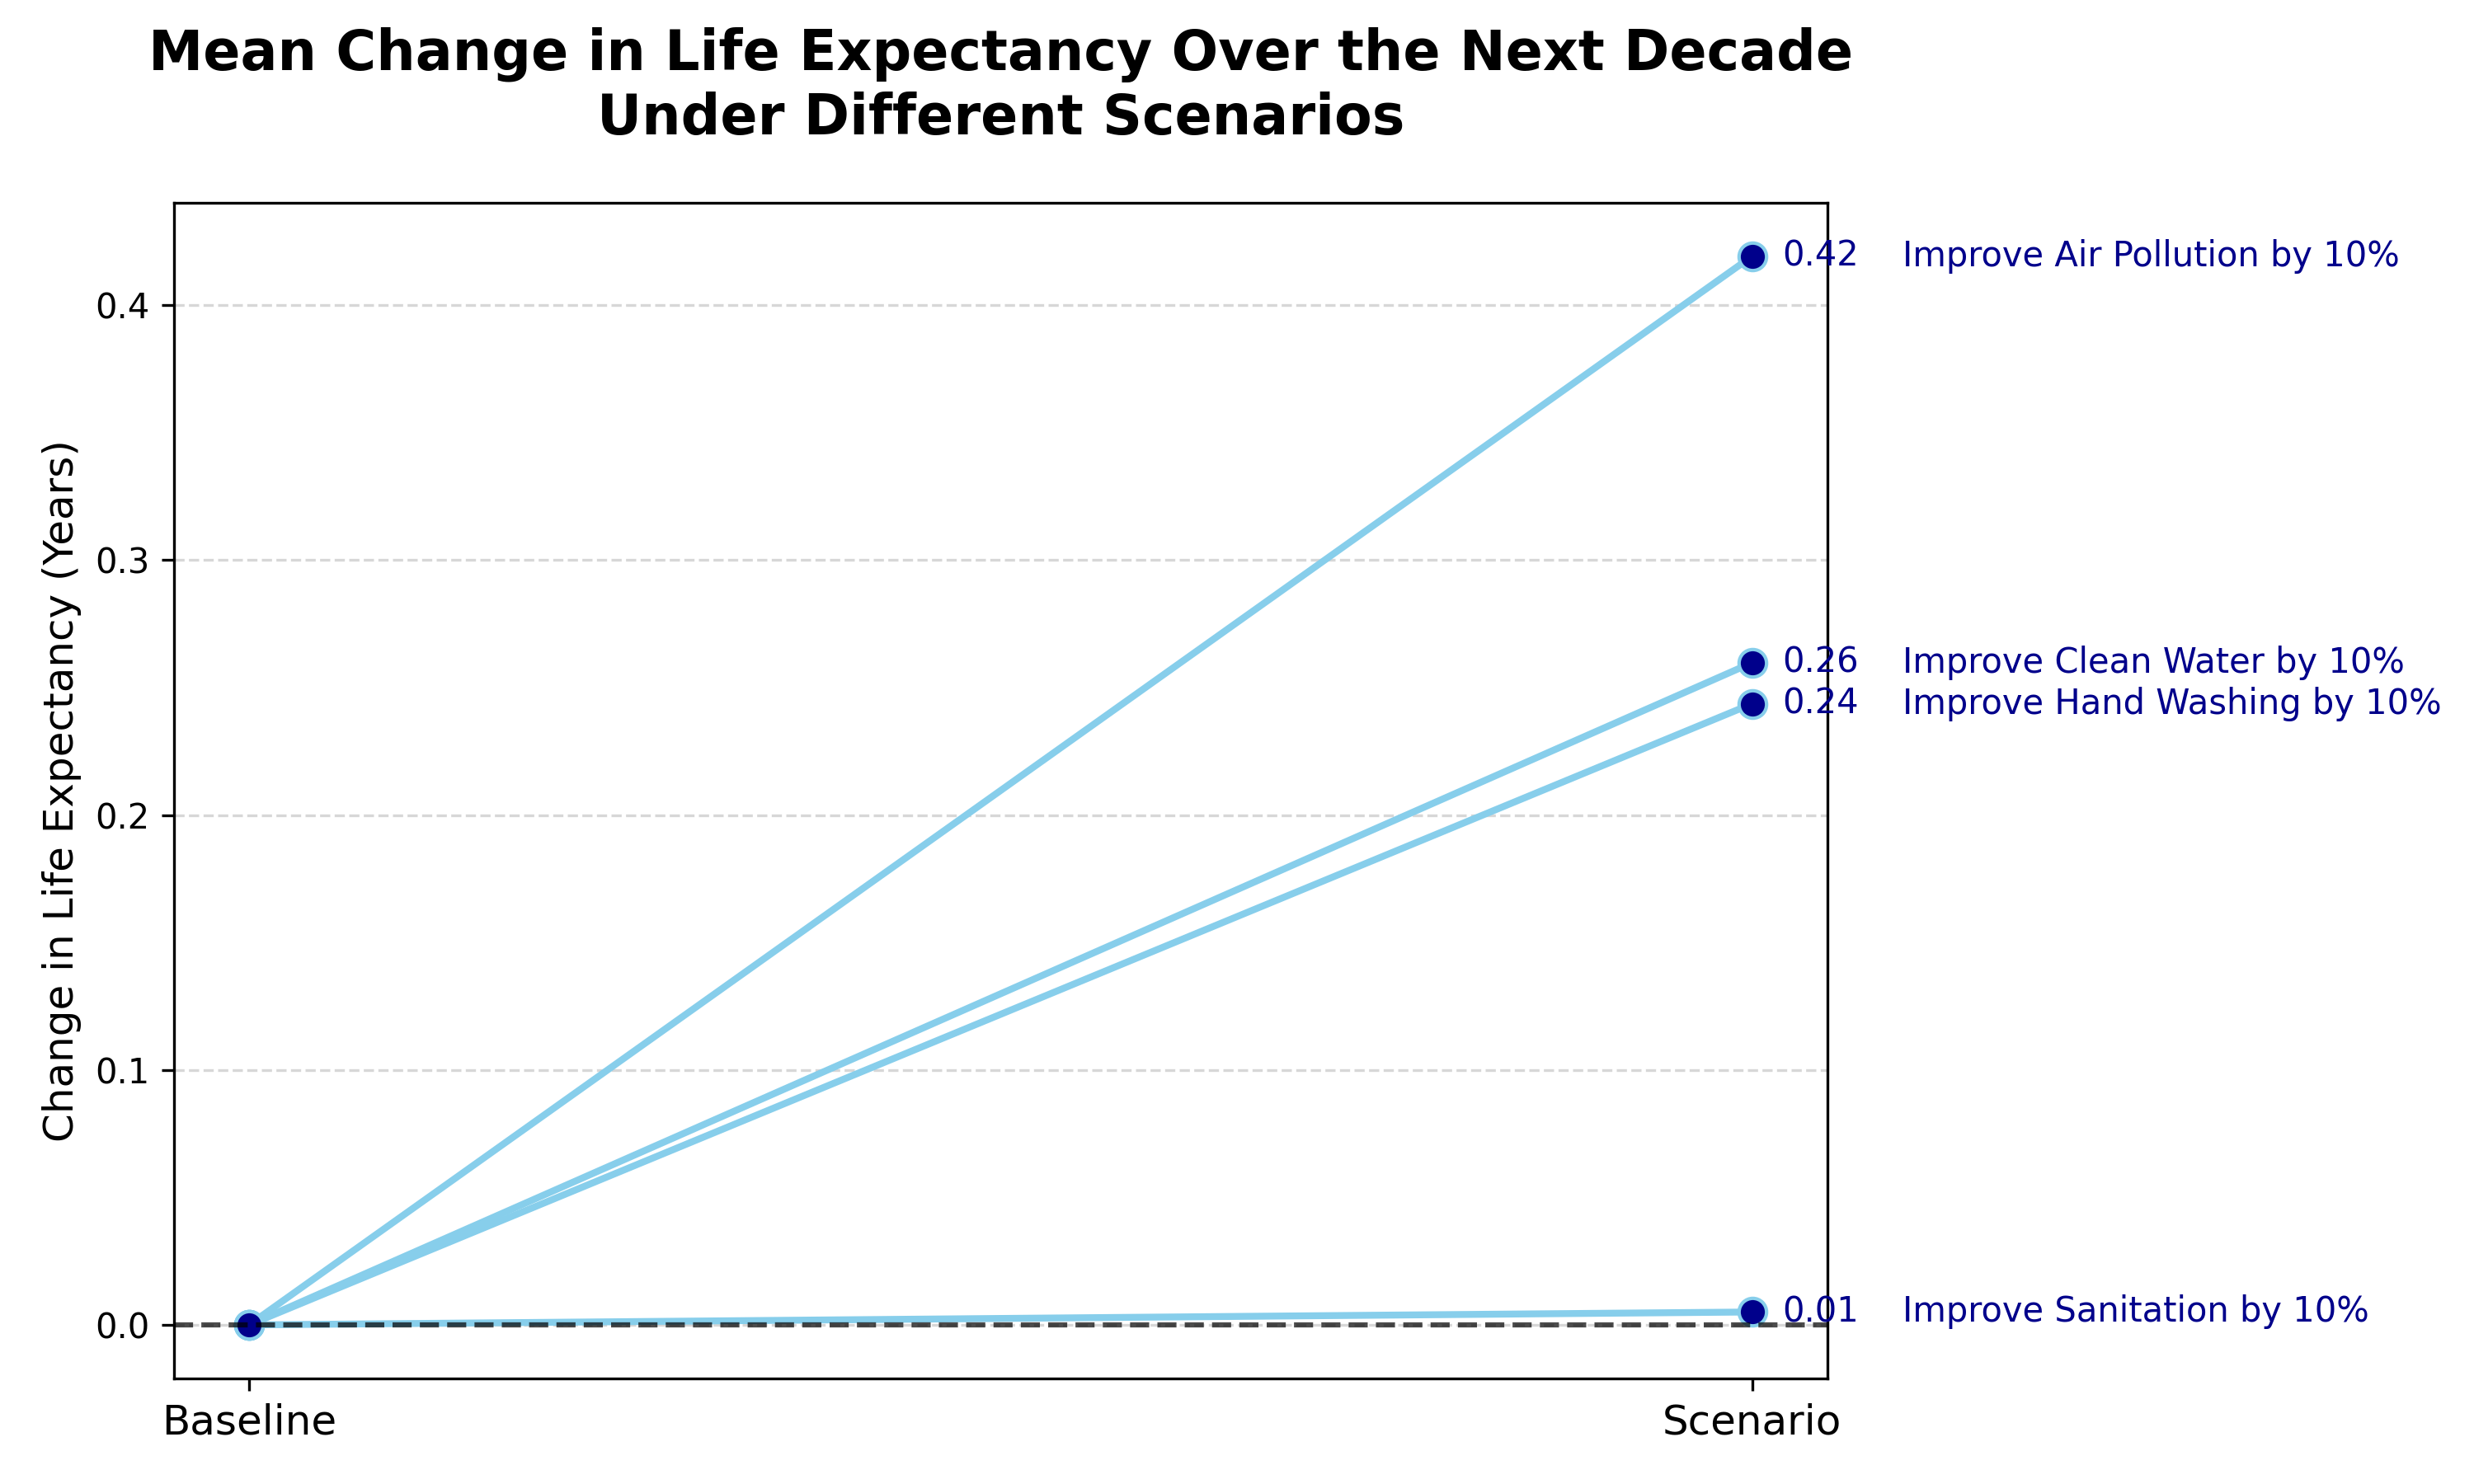



Our analysis involved assessing the potential impact of improving key environmental factors by 10% across different scenarios. The changes in life expectancy for each scenario were compared to the baseline, and the following results were observed:

1. Air Quality (Improve Air Pollution by 10%): Among the factors analyzed, air quality was found to have the most significant impact on life expectancy, with an increase of 0.42 years. This suggests that reducing air pollution could yield substantial public health benefits, especially considering the high mortality rates linked to poor air quality.

2. Clean Water (Improve Clean Water by 10%): Access to clean water was the second most influential factor, leading to a 0.26-year improvement in life expectancy. This underscores the importance of ensuring that communities have reliable access to safe drinking water, particularly in regions where water quality is a significant public health concern.

3. Hand Washing (Improve Hand Washing by 10%): An improvement in the use of hand-washing facilities resulted in a 0.24-year increase in life expectancy. While smaller than air quality and clean water, the importance of hygiene in preventing infectious diseases cannot be understated, making it an essential factor for public health.

4. Sanitation (Improve Sanitation by 10%): Sanitation had the smallest impact on life expectancy, with a relatively modest increase of 0.01 years. Although the impact of sanitation was lower than that of the other factors, it is still critical, particularly in underdeveloped regions where inadequate sanitation can contribute to the spread of diseases.

### **Conclusion**

In conclusion, the scenario analysis clearly shows that environmental improvements can have a meaningful impact on life expectancy. The key findings and conclusions from the analysis are as follows:

1. Air Quality: Prioritizing improvements in air quality should be a major focus. A 10% reduction in air pollution is predicted to increase life expectancy by 0.42 years. Air pollution is a leading cause of death worldwide, and tackling this issue could lead to significant public health benefits.

2. Clean Water: Ensuring access to clean water is crucial. A 10% improvement in clean water access results in an increase of 0.26 years in life expectancy. This highlights the need for continued investment in water infrastructure, especially in areas where waterborne diseases are prevalent.

3. Hand Washing: Improving access to hand-washing facilities is also important. A 10% improvement in hand hygiene practices could increase life expectancy by 0.24 years. Promoting hygiene and sanitation education is essential to prevent the spread of infectious diseases, particularly in low-income regions.

4. Sanitation: Although the impact of improving sanitation was smaller, with an increase of only 0.01 years, it is still a fundamental factor in health. Improving sanitation infrastructure is critical for reducing the spread of disease and improving quality of life, especially in underserved regions.

Key Takeaways
1. The most impactful intervention for increasing life expectancy is improving air quality, followed by access to clean water and hand hygiene.
2. Sanitation, while important, has a relatively smaller impact compared to the other factors but should not be neglected in global health strategies.
3. These results suggest that public health policies should focus on improving air quality, water access, and hygiene practices, as these interventions can yield significant improvements in life expectancy.